In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import torch
import torch.nn as nn

## TO DO

1. Define SGD function
2. Define Newton's function
3. Define Quasi-Newton's method
4. Write simulation function (in-progress; BP)
5. Write simulation comparison code / Post Processing (in-progress; BP)

## FINISHED
1. Write data generating function
2. Write Normal Equation function (theoretical)

## Functions

SGD
epoch 0, loss 1.5156276226043701
epoch 50, loss 0.16607540845870972
epoch 100, loss 0.08622083067893982
epoch 150, loss 0.06524300575256348
epoch 200, loss 0.05973213538527489
epoch 250, loss 0.05828443169593811
epoch 300, loss 0.05790412053465843
epoch 350, loss 0.057804208248853683
epoch 400, loss 0.05777795612812042
epoch 450, loss 0.057771068066358566

predicted :  2.0092309
true      :  2


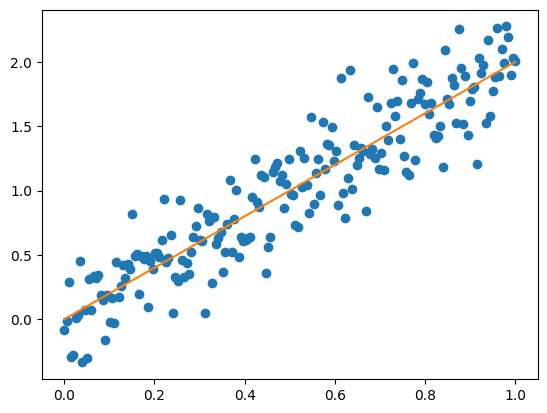

In [2]:
#CREATE SIMULATION DATA
# creates feature matrix and corresponding observation.
# y - n x 1 matrix of normal distribution data of mu and sigma
# X - n x m matrix of parameters. First column is the intercept which is always 1
# Each parameter (column) is from the normal distribution of mu and sigma
# default is std norm: mu = 0, sd = 1

def create_sim_data_lr(n,m,mu = 0, sigma = 1):
    y = np.random.normal(mu,sigma,size = (n,1))    
    X = np.random.normal(mu,sigma,size = (n,m))
    X[:,0] = 1
    
    return ((X,y))

### Normal Equation (Theoretical)
# Closed Form Solution
# beta_hat = (X^T %*% X)^-1 %*% X %*% y
def normal_eq_lr(X,y):
    A = np.linalg.inv(np.matmul(np.transpose(X),X))
    B = np.matmul(np.transpose(X),y)
    return(np.matmul(A,B))


def sim_linear(n_points, b1, noise_std):
    """Simulate a linear regression problem.
    
    Parameters
    ----------
    n_points : int
        Number of simulated points per observation.
    b1 : float
        Slope to predict.
    noise_std : float
        Width of Guassian (white) noise.
        
    Returns
    -------
    X : 1d array
        Randomly sampled x-values.
    y : 1d array
        Y-values with added white noise.
    """
    
    X = np.linspace(0, 1, n_points)
    noise = np.random.normal(0, noise_std, n_points)
    y = b1*X + noise
    
    return X, y


# Simulate
b1 = 2
X, y = sim_linear(200, b1, .25)

plt.scatter(X, y)
plt.plot(X, b1 * X, color='C1')

X = X.reshape(-1, 1).astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)

X = torch.from_numpy(X)
y = torch.from_numpy(y)

# Linear regression
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)
    
### SGD
print('SGD')
model = LinearRegression()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(500):
 
    y_hat = model(X)
 
    # Compute loss
    loss = criterion(y_hat, y)
 
    # Zero gradients
    optimizer.zero_grad()
    
    # Backpropaget and update weights
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))
        
print()       
print('predicted : ', model.linear.weight.detach().numpy()[0][0])
print('true      : ', 2)
    
### Newton's

### Quasi-Newton


In [3]:
# Simulate a linear model with N betas and M examples
N = 10    # betas
M = 100 # examples

X = np.random.rand(M, N)
b = np.random.normal(size=N)

b -= b.mean()
X -= X.mean(axis=0)

y = np.dot(X, b)


X = X.astype(np.float32)
y = y.reshape(M, 1).astype(np.float32)

X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [4]:
# Linear regression
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(N, 1)
        
    def forward(self, x):
        return self.linear(x)
    
### SGD
print('SGD')
model = LinearRegression()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
 
    y_hat = model(X)
 
    # Compute loss
    loss = criterion(y_hat, y)
 
    # Zero gradients
    optimizer.zero_grad()
    
    # Backpropaget and update weights
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))
        
y_hat = model(X)
y_hat = y_hat.detach().numpy()[:, 0]



SGD
epoch 0, loss 0.3343839645385742
epoch 50, loss 0.2779105007648468
epoch 100, loss 0.2314118593931198
epoch 150, loss 0.19305871427059174
epoch 200, loss 0.16137489676475525
epoch 250, loss 0.13515949249267578
epoch 300, loss 0.11343342810869217
epoch 350, loss 0.09539764374494553
epoch 400, loss 0.08039920032024384
epoch 450, loss 0.06790430843830109
epoch 500, loss 0.057475801557302475
epoch 550, loss 0.048755474388599396
epoch 600, loss 0.041449353098869324
epoch 650, loss 0.035316016525030136
epoch 700, loss 0.03015679307281971
epoch 750, loss 0.02580810710787773
epoch 800, loss 0.022134961560368538
epoch 850, loss 0.019025947898626328
epoch 900, loss 0.016388870775699615
epoch 950, loss 0.014147303067147732


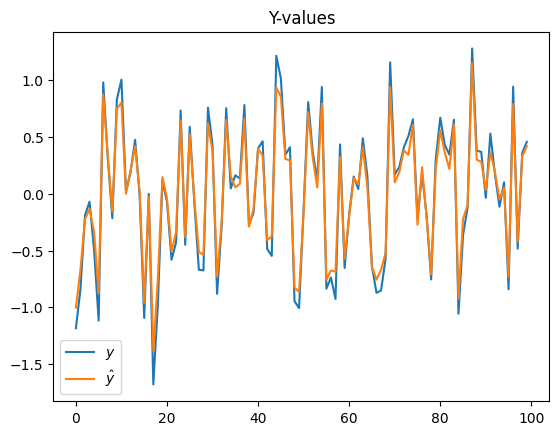

In [5]:
plt.title('Y-values')
plt.plot(y, label=r'$y$')
plt.plot(y_hat, label=r'$\hat{y}$')
plt.legend();

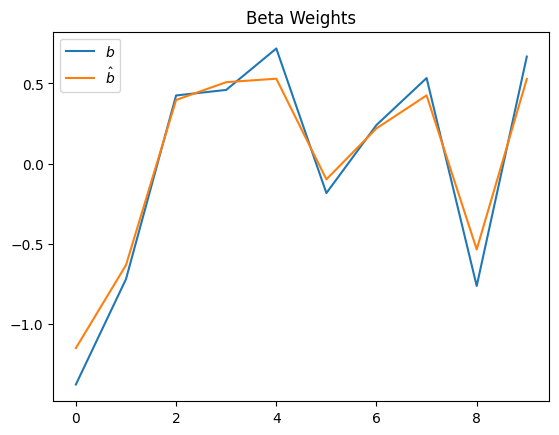

In [6]:
plt.title('Beta Weights')

plt.plot(b, label=r'$b$')
plt.plot(model.linear.weight.detach().numpy()[0], label=r'$\hat{b}$')
plt.legend()

## Simulations

The goal of these simulations is to create cases where we have n samples (could be low or high) and m features (1-1000). In the context of an optimization problem, compare the performance between SGD, Newton's method, and Quasi-Newton for each case.

Optimization problems to try: Regression, Classification (maybe if we don't have time, we can stick to regression only)

In [37]:
nsim = 1000 # number of simulations
m = 1000 # number of features
n = 10000 # number of observations
np.random.seed(123) # set seed for reproducibility

res = {'normal-eq': dict(), 'sgd': dict(),'newton': dict(),'quasi-newton':dict()} # Store betas for each method here
res_time = {'normal-eq': dict(), 'sgd': dict(),'newton': dict(),'quasi-newton':dict()} # Store runtimes for each method here
for i in tqdm(range(nsim)):
    data = create_sim_data_lr(n,m) # for each iteration, generate new data
    
    ### Expected: beta_m parameters in a list
    
    # DO theoretical soln:
    # beta_hat = (X^T %*% X)^-1 %*% X %*% y
    # This solution might not be available...
    try:
        start = time.time()
        res['normal-eq'][i] = normal_eq_lr(data[0],data[1])[:,0].tolist()
        end = time.time()
        res_time['normal-eq'][i] = end-start # records the time elapsed to calculate
    except:
        res['normal-eq'][i] = 'Did not compute'
        res_time['normal-eq'][i] = 'NA'
    
    
    # DO SGD
    #res['sgd'][i] = 
    # DO NEWTON'S
    #res['newton'][i] = 
    # DO QUASI NEWTON'S
    #res['quasi-newton'][i] = 
    
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [50]:
### VISUALIZATION FUNCTIONS TO COMPARE SIMULATION TIMES AS WELL AS BETAS FOR EACH METHOD
dfs = []
normal_eq_times = pd.DataFrame.from_dict(res_time['normal-eq'], orient='index')
normal_eq_betas = pd.DataFrame.from_dict(res['normal-eq']) # Each column is a simulation, Each row is a beta
#normal_eq_betas_vals = normal_eq_betas
normal_eq_beta_hats = normal_eq_betas.mean(axis=1)
normal_eq_beta_sds = normal_eq_betas.std(axis=1)

normal_eq_betas['beta_hat'] = normal_eq_beta_hats
normal_eq_betas['sd'] = normal_eq_beta_sds
#sgd_times = pd.DataFrame.from_dict(res_time['sgd'], orient='index')
#newton_times = pd.DataFrame.from_dict(res_time['newton'], orient='index')
#quasi_newton_times = pd.DataFrame.from_dict(res_time['quasi-newton'], orient='index')
#dfs.append(normal_eq_times,sgd_times,newton_times,quasi_newton_times)

#dfs = pd.concat(dfs,axis = 1) # combines all the times together into one matrix for easy computation
# get the mean time and sd for each method and plot in a violin plot? similar to what I showed in the midterm presentation


# X axis is betas
# Y axis is value

# overlay methods ontop of each other in different colors